In [1]:
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
# Data Source:https://unstats.un.org/sdgs/UNSDGAPIV5/swagger/index.html
un_goals = pd.read_csv("Resources/UN_Goals.csv")

un_goals_clean = un_goals[["Target", 'GeoAreaName', 'TimePeriod', 'Value', '[Units]']]
un_goals_clean

,Target,GeoAreaName,TimePeriod,Value,[Units]
0,13.2,Canada,1990,601.52369,MT_CO2E
1,13.2,Canada,1991,595.77673,MT_CO2E
2,13.2,Canada,1992,613.59852,MT_CO2E
3,13.2,Canada,1993,616.79839,MT_CO2E
4,13.2,Canada,1994,638.00047,MT_CO2E
...,...,...,...,...,...
129,13.a,World,2014,43.24000,CU_USD_B
130,13.a,World,2015,45.40000,CU_USD_B
131,13.a,World,2016,49.43000,CU_USD_B
132,13.a,World,2017,45.51000,CU_USD_B


In [6]:
# Data Source: https://data.ec.gc.ca/data/substances/monitor/canada-s-official-greenhouse-gas-inventory/B-Economic-Sector/?lang=en

canada_result = pd.read_csv("Resources/Economic_Sector_Canada.csv")
canada_result.head()


,Sectors - Mt CO2 eq,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NATIONAL TOTAL,595,588,605,608,628,645,667,682,689,...,721,726,732,730,733,715,725,740,738,672
1,Oil and Gas,103,102,111,118,122,128,135,137,141,...,187,194,199,205,205,194,196,205,203,179
2,Electricity,95,96,103,93,95,98,98,109,122,...,87,83,80,76,80,74,73,63,62,56
3,Transport,120,114,115,117,121,122,126,131,137,...,168,171,174,171,172,173,179,184,185,159
4,Heavy Industry,97,97,95,94,100,100,103,103,98,...,80,80,79,79,78,76,76,77,77,72


In [7]:
#transposed
df1 = canada_result.set_index(['Sectors - Mt CO2 eq'])
df2 = df1.transpose()
df3 = df2[['Oil and Gas', 'Electricity', 'Transport','NATIONAL TOTAL']]
df4 = df3.reset_index()
transpose_can_result = df4.rename(columns={'index':'Years'})
transpose_can_result

Sectors - Mt CO2 eq,Years,Oil and Gas,Electricity,Transport,NATIONAL TOTAL
0,1990,103,95,120,595
1,1991,102,96,114,588
2,1992,111,103,115,605
3,1993,118,93,117,608
4,1994,122,95,121,628
5,1995,128,98,122,645
6,1996,135,98,126,667
7,1997,137,109,131,682
8,1998,141,122,137,689
9,1999,150,119,143,702


In [8]:
# Data Source: https://data.ec.gc.ca/data/substances/monitor/canada-s-official-greenhouse-gas-inventory/B-Economic-Sector/?lang=en

provices_result = pd.read_csv("Resources/Economic_Sector_Prov.csv")
provices_result.head()


,Year,Region,Index,Source,CO2eq,Unit
0,1990,Alberta,0,Provincial Inventory Total,165.65,Mt
1,1990,Alberta,1,Oil and Gas,61.96,Mt
2,1990,Alberta,2,Electricity,39.76,Mt
3,1990,Alberta,3,Transport,15.78,Mt
4,1990,Alberta,4,Heavy Industry,12.59,Mt


# Visualisation - Annbell

In [14]:
Canada_df =  transpose_can_result.groupby('Years').sum()[["Oil and Gas","Electricity","Transport"]]
Canada_df 

Sectors - Mt CO2 eq,Oil and Gas,Electricity,Transport
Years,,,
1990,103,95,120
1991,102,96,114
1992,111,103,115
1993,118,93,117
1994,122,95,121
1995,128,98,122
1996,135,98,126
1997,137,109,131
1998,141,122,137


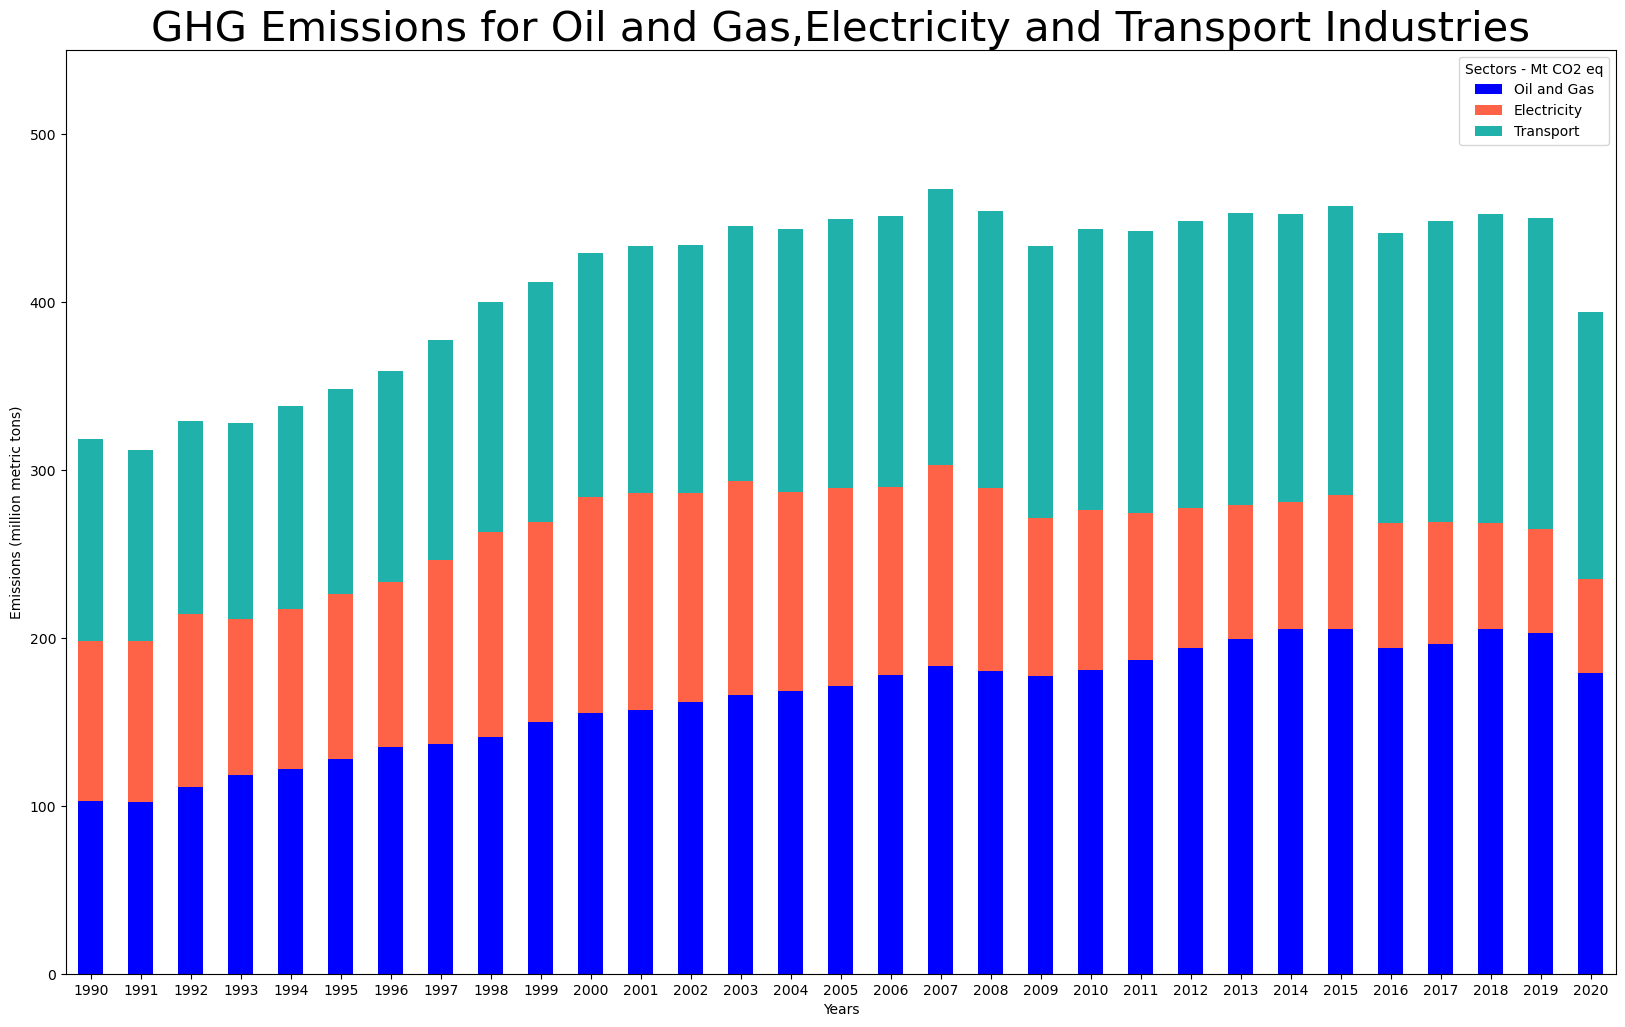

<Figure size 640x480 with 0 Axes>

In [47]:
#Generate a Stacked bar graph of Canada industries for Oil and & gas, Electricity and transport showing GHG emissions per year 

ax = Canada_df.plot.bar(stacked=True, color =['blue', 'tomato','lightseagreen'], figsize=(20,12))
ax.set_title('GHG Emissions for Oil and Gas,Electricity and Transport Industries', fontsize=30)
ax.set_ylim(0,550)

ax.set_xticklabels(["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"], rotation=0)

plt.xlabel("Years")
plt.ylabel("Emissions (million metric tons)")


#show graph and set layout
plt.show()
plt.tight_layout()


# Toki

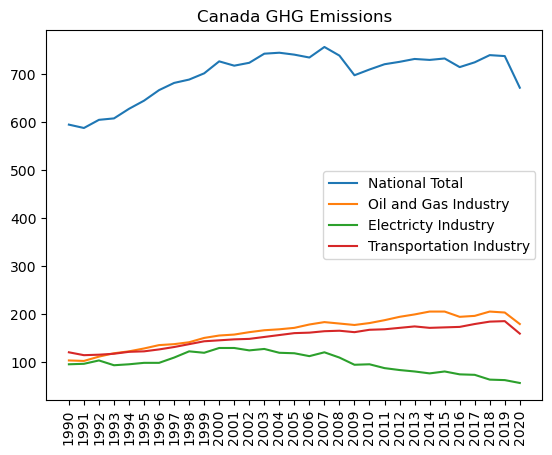

---------------------------------------------------------------------------


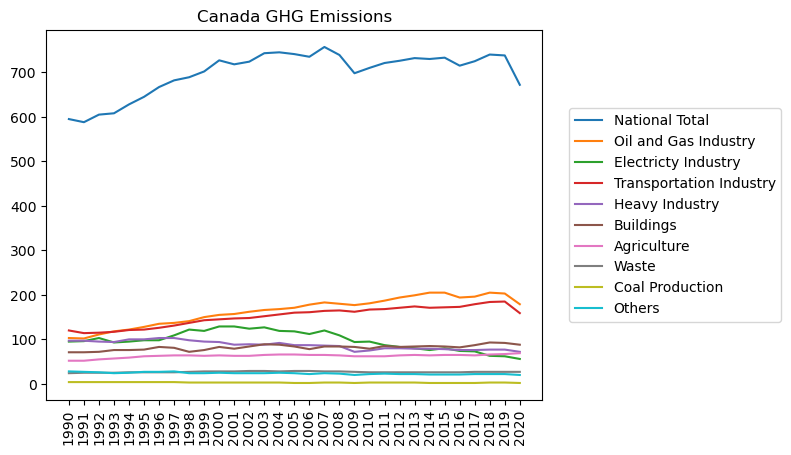

---------------------------------------------------------------------------


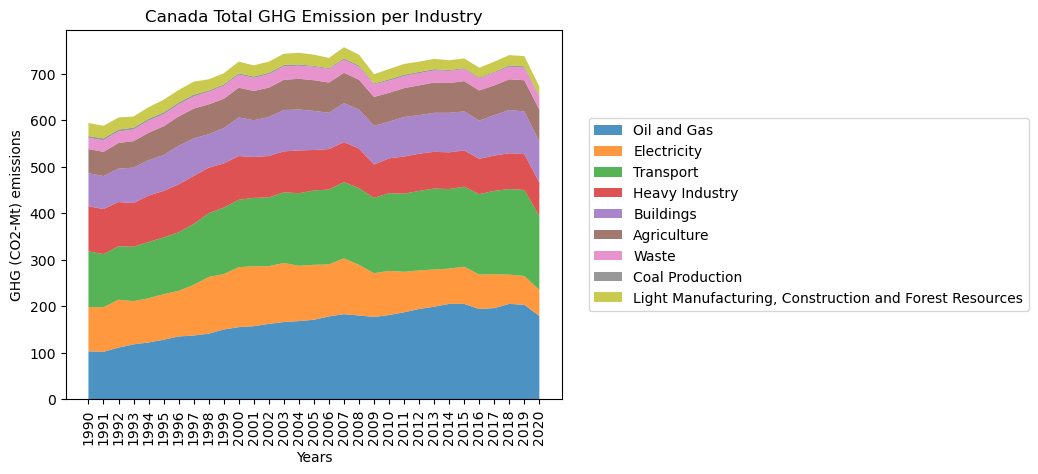

In [45]:
#preparing and cleaning dataset
df_1 = canada_result.set_index(['Sectors - Mt CO2 eq'])
df_2 = df_1.transpose()
df_4 = df_2.reset_index()
transpose_can_result_2 = df_4.rename(columns={'index':'Years'})

#two line graphs and stackplot

y2_nat_ttl = transpose_can_result_2['NATIONAL TOTAL']
y2_oil_gas = transpose_can_result_2['Oil and Gas']
y2_elec = transpose_can_result_2['Electricity']
y2_transp = transpose_can_result_2['Transport']
x2_years = transpose_can_result_2['Years']

plt.plot(x2_years, y2_nat_ttl, label = 'National Total')
plt.plot(x2_years, y2_oil_gas, label = 'Oil and Gas Industry')
plt.plot(x2_years, y2_elec, label = 'Electricty Industry')
plt.plot(x2_years, y2_transp, label = 'Transportation Industry')
plt.legend()
plt.xticks(rotation = 90)
plt.title('Canada GHG Emissions')
plt.savefig('Images/ghgpercanind_stackplt.png', bbox_inches='tight')
plt.show()

print("---------------------------------------------------------------------------")

y_nat_ttl = transpose_can_result_2['NATIONAL TOTAL']
y_oil_gas = transpose_can_result_2['Oil and Gas']
y_elec = transpose_can_result_2['Electricity']
y_transp = transpose_can_result_2['Transport']
y_hvyind = transpose_can_result_2['Heavy Industry']
y_bldgs = transpose_can_result_2['Buildings']
y_agri = transpose_can_result_2['Agriculture']
y_wst = transpose_can_result_2['Waste']
y_coal = transpose_can_result_2['Coal Production']
y_lmcfr = transpose_can_result_2['Light Manufacturing, Construction and Forest Resources']
x_years = transpose_can_result_2['Years']

plt.plot(x_years, y_nat_ttl, label = 'National Total')
plt.plot(x_years, y_oil_gas, label = 'Oil and Gas Industry')
plt.plot(x_years, y_elec, label = 'Electricty Industry')
plt.plot(x_years, y_transp, label = 'Transportation Industry')
plt.plot(x_years, y_hvyind, label = 'Heavy Industry')
plt.plot(x_years, y_bldgs, label = 'Buildings')
plt.plot(x_years, y_agri, label = 'Agriculture')
plt.plot(x_years, y_wst, label = 'Waste')
plt.plot(x_years, y_coal, label = 'Coal Production')
plt.plot(x_years, y_lmcfr, label = 'Others')
plt.legend(bbox_to_anchor = (1.04, 0.5), loc = "center left")
plt.xticks(rotation = 90)
plt.title('Canada GHG Emissions')
plt.show()

print("---------------------------------------------------------------------------")

emissions_df = transpose_can_result_2[['Oil and Gas', 'Electricity', 'Transport', 
                                    'Heavy Industry', 'Buildings', 'Agriculture', 'Waste', 'Coal Production', 
                                    'Light Manufacturing, Construction and Forest Resources']]
emissions_dict = emissions_df.to_dict('list')

years = transpose_can_result_2['Years']


fig, ax = plt.subplots()
ax.stackplot(years, emissions_dict.values(), labels = emissions_dict.keys(), alpha = 0.8)
ax.legend(bbox_to_anchor = (1.04, 0.5), loc = "center left")
plt.xticks(rotation = 90)
plt.ylabel('GHG (CO2-Mt) emissions')
plt.xlabel('Years')
plt.title('Canada Total GHG Emission per Industry')
plt.savefig('Images/ghgpercanind_stackplt.png', bbox_inches='tight')
plt.show()

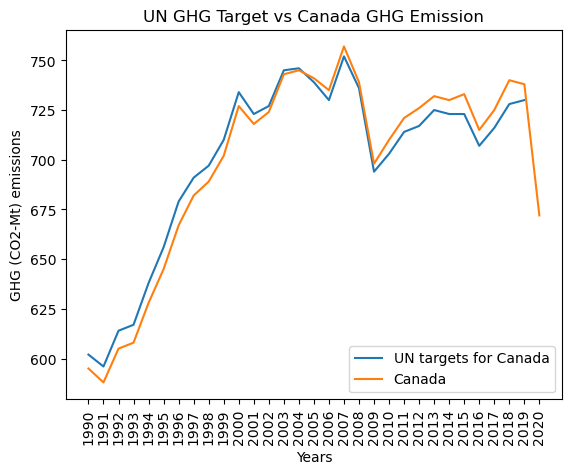

In [64]:
#preparing and cleaning original dataset
un_13_2 = un_goals_clean.loc[un_goals_clean['Target'] == '13.2']

can_y = transpose_can_result_2['NATIONAL TOTAL']

# can_x = transpose_can_result_2['Years']
can_x = ["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002",
          "2003","2004","2005","2006","2007","2008","2009","2010","2011","2012",
          "2013","2014","2015","2016","2017","2018","2019", '2020']
un_y = un_13_2['Value'].round().astype(int)

# un_x = un_13_2['TimePeriod']
un_x = ["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002",
          "2003","2004","2005","2006","2007","2008","2009","2010","2011","2012",
          "2013","2014","2015","2016","2017","2018","2019"]

plt.plot(un_x, un_y, label = 'UN targets for Canada')
plt.plot(can_x, can_y, label = 'Canada')                                                      
plt.legend()
plt.xticks(rotation = 90)
plt.ylabel('GHG (CO2-Mt) emissions')
plt.xlabel('Years')
plt.title('UN GHG Target vs Canada GHG Emission')
plt.savefig('Images/ghgcanvsUN_line.png', bbox_inches='tight')
plt.show()

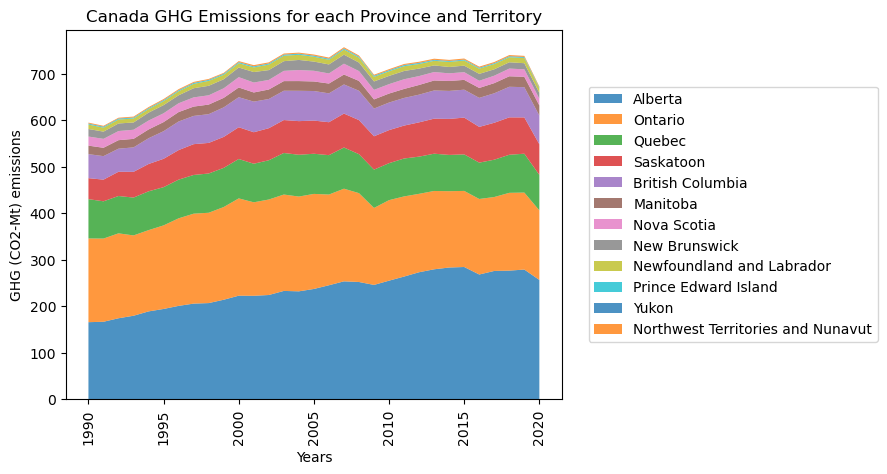

In [52]:
#copying original data and doing some initial cleaning
emission_provterri_df = provices_result.loc[(provices_result['Source'] == 'Provincial Inventory Total') | (provices_result['Source'] == 'Territorial Inventory Total')]
emission_provterri_df2 = emission_provterri_df.drop(columns = ['Index', 'Source', 'Unit']).reset_index(drop = True)

#isolating each province from original datasetcleaning provincial dataset, and adding northwest territoties and nunavut together to match original dataset's format
ab_ghg = emission_provterri_df2.loc[emission_provterri_df2['Region'] == 'Alberta']
bc_ghg = emission_provterri_df2.loc[emission_provterri_df2['Region'] == 'British Columbia']
mn_ghg = emission_provterri_df2.loc[emission_provterri_df2['Region'] == 'Manitoba']
nb_ghg = emission_provterri_df2.loc[emission_provterri_df2['Region'] == 'New Brunswick']
nfl_ghg = emission_provterri_df2.loc[emission_provterri_df2['Region'] == 'Newfoundland and Labrador']
ns_ghg = emission_provterri_df2.loc[emission_provterri_df2['Region'] == 'Nova Scotia']
on_ghg = emission_provterri_df2.loc[emission_provterri_df2['Region'] == 'Ontario']
pei_ghg = emission_provterri_df2.loc[emission_provterri_df2['Region'] == 'Prince Edward Island']
qc_ghg = emission_provterri_df2.loc[emission_provterri_df2['Region'] == 'Quebec']
ssk_ghg = emission_provterri_df2.loc[emission_provterri_df2['Region'] == 'Saskatchewan']
yuk_ghg = emission_provterri_df2.loc[emission_provterri_df2['Region'] == 'Yukon']

nwtnvt_1 = emission_provterri_df2.loc[emission_provterri_df2['Region'] == 'Northwest Territories and Nunavut']
nwtnvt_2 = nwtnvt_1.drop(columns = {'Region'}).reset_index(drop=True)
nwt_nv1 = emission_provterri_df2.loc[(emission_provterri_df2['Region'] == 'Northwest Territories') | (emission_provterri_df2['Region'] == 'Nunavut')]
nwt_nv2 = nwt_nv1.drop(columns={'Region'}).reset_index(drop = True)
nwt_nv3 = nwt_nv2.astype(float)
sum_ghg_nwt_nv = nwt_nv3.groupby('Year').sum()
nwt_nun_ghg = sum_ghg_nwt_nv['CO2eq']
nwt_nun_yr = nwt_nv3['Year'].unique()
nwt_nun_list = {'Year' : nwt_nun_yr, 'CO2eq' : nwt_nun_ghg}
nwt_nun_df = pd.DataFrame(data=nwt_nun_list).reset_index(drop=True)
nwtnvt_df = pd.concat([nwtnvt_2, nwt_nun_df]).reset_index(drop=True)

#further cleaning provincial dataset
ab_ghg1 = ab_ghg.drop(columns = ['Region'])
bc_ghg1 = bc_ghg.drop(columns = ['Region'])
mn_ghg1 = mn_ghg.drop(columns = ['Region'])
nb_ghg1 = nb_ghg.drop(columns = ['Region'])
nfl_ghg1 = nfl_ghg.drop(columns = ['Region'])
ns_ghg1 = ns_ghg.drop(columns = ['Region'])
on_ghg1 = on_ghg.drop(columns = ['Region'])
pei_ghg1 = pei_ghg.drop(columns = ['Region'])
qc_ghg1 = qc_ghg.drop(columns = ['Region'])
ssk_ghg1 = ssk_ghg.drop(columns = ['Region'])
yuk_ghg1 = yuk_ghg.drop(columns = ['Region'])

ab_ghg_fin = ab_ghg1.rename(columns = {'CO2eq' : 'Alberta'}).reset_index(drop=True)
bc_ghg_fin = bc_ghg1.rename(columns = {'CO2eq' : 'British Columbia'}).reset_index(drop=True)
mn_ghg_fin = mn_ghg1.rename(columns = {'CO2eq' : 'Manitoba'}).reset_index(drop=True)
nb_ghg_fin = nb_ghg1.rename(columns = {'CO2eq' : 'New Brunswick'}).reset_index(drop=True)
nfl_ghg_fin = nfl_ghg1.rename(columns = {'CO2eq' : 'Newfoundland and Labrador'}).reset_index(drop=True)
ns_ghg_fin = ns_ghg1.rename(columns = {'CO2eq' : 'Nova Scotia'}).reset_index(drop=True)
on_ghg_fin = on_ghg1.rename(columns = {'CO2eq' : 'Ontario'}).reset_index(drop=True)
pei_ghg_fin = pei_ghg1.rename(columns = {'CO2eq' : 'Prince Edward Island'}).reset_index(drop=True)
qc_ghg_fin = qc_ghg1.rename(columns = {'CO2eq' : 'Quebec'}).reset_index(drop=True)
ssk_ghg_fin = ssk_ghg1.rename(columns = {'CO2eq' : 'Saskatoon'}).reset_index(drop=True)
yuk_ghg_fin = yuk_ghg1.rename(columns = {'CO2eq' : 'Yukon'}).reset_index(drop=True)
nwt_nvt_ghg_fin = nwtnvt_df.rename(columns = {'CO2eq' : "Northwest Territories and Nunavut"})

#merging dataset
prvterghg1 = ab_ghg_fin.merge(bc_ghg_fin, on = 'Year', how = 'left')
prvterghg2 = prvterghg1.merge(mn_ghg_fin, on = 'Year', how = 'left')
prvterghg3 = prvterghg2.merge(nb_ghg_fin, on = 'Year', how = 'left')
prvterghg4 = prvterghg3.merge(nfl_ghg_fin, on = 'Year', how = 'left')
prvterghg5 = prvterghg4.merge(ns_ghg_fin, on = 'Year', how = 'left')
prvterghg6 = prvterghg5.merge(on_ghg_fin, on = 'Year', how = 'left')
prvterghg7 = prvterghg6.merge(pei_ghg_fin, on = 'Year', how = 'left')
prvterghg8 = prvterghg7.merge(qc_ghg_fin, on = 'Year', how = 'left')
prvterghg9 = prvterghg8.merge(ssk_ghg_fin, on = 'Year', how = 'left')
prvterghg10 = prvterghg9.merge(yuk_ghg_fin, on = 'Year', how = 'left')
prv_ter_ghg = prvterghg10.merge(nwt_nvt_ghg_fin, on = 'Year', how = 'left')

#plotting
prv_ter_ghg_df = prv_ter_ghg[['Alberta', 'Ontario', 'Quebec', 'Saskatoon', 'British Columbia', 'Manitoba', 'Nova Scotia',
                            'New Brunswick', 'Newfoundland and Labrador', 'Prince Edward Island', 'Yukon',
                           'Northwest Territories and Nunavut']].astype(float)
prv_ter_ghg_dict = prv_ter_ghg_df.to_dict('list')

prv_ter_ghg_years = prv_ter_ghg['Year']

fig, ax = plt.subplots()
ax.stackplot(prv_ter_ghg_years, prv_ter_ghg_dict.values(), labels = prv_ter_ghg_dict.keys(), alpha = 0.8)
ax.legend(bbox_to_anchor = (1.04, 0.5), loc = "center left")
plt.xticks(rotation = 90)
plt.ylabel('GHG (CO2-Mt) emissions')
plt.xlabel('Years')
plt.title('Canada GHG Emissions for each Province and Territory')
plt.savefig('Images/ghgpercanprovandteri_stackplt.png', bbox_inches='tight')
plt.show()

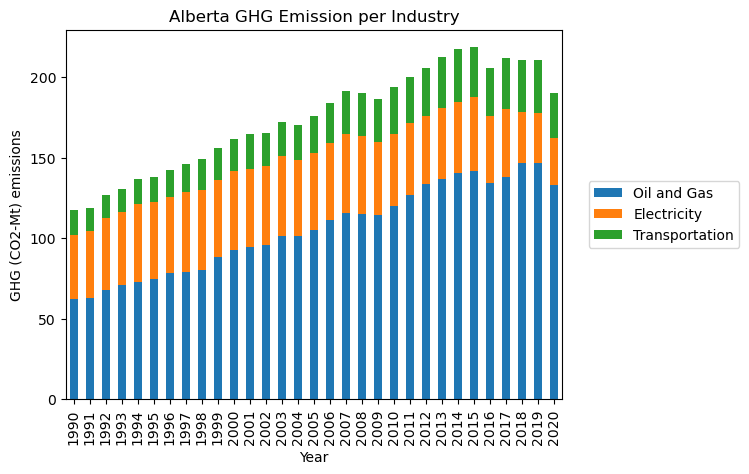

---------------------------------------------------------------------------------------------------------


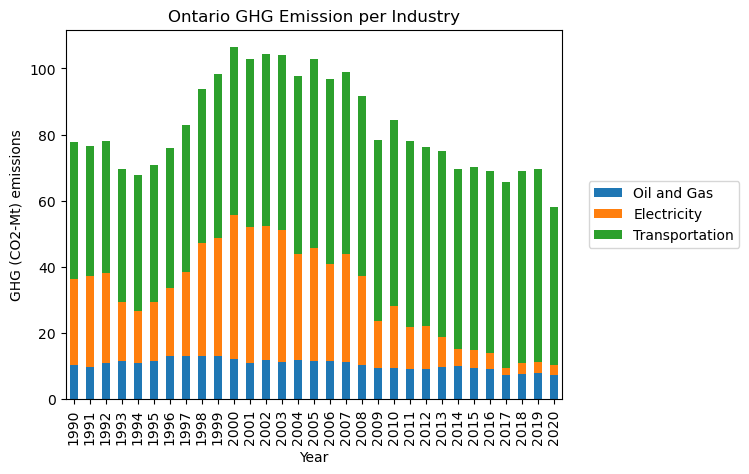

---------------------------------------------------------------------------------------------------------


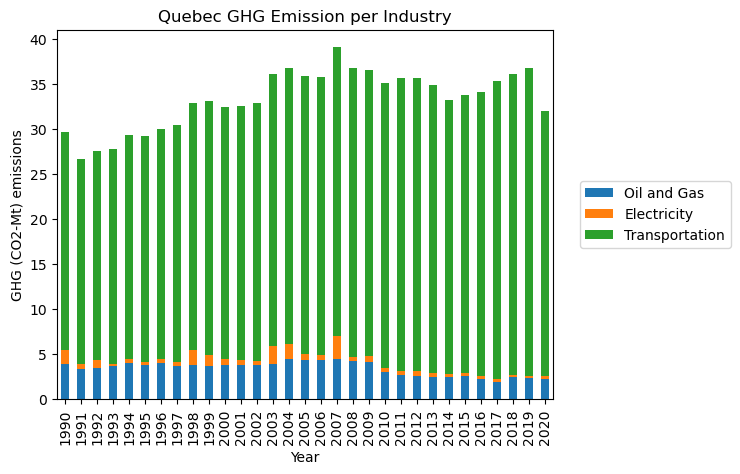

In [60]:
#AB's, ON's, and QC's GHG emission per industry (Oil and Gas, Electricity, and Transportation)

ab1 = provices_result.loc[(provices_result['Region'] == 'Alberta')]
ab2 = ab1.loc[(ab1['Source'] == 'Provincial Inventory Total') 
                    | (ab1['Source'] == 'Oil and Gas') | (ab1['Source'] == 'Electricity')
                    | (ab1['Source'] == 'Transport')
                   ]

ab_oilgas_df = ab2.loc[ab2['Source'] == 'Oil and Gas']
ab_elect_df = ab2.loc[ab2['Source'] == 'Electricity']
ab_transp_df = ab2.loc[ab2['Source'] == 'Transport']

ab_oilgas_cln = ab_oilgas_df.drop(columns = ['Region', 'Index', 'Source', 'Unit'])
ab_elect_cln = ab_elect_df.drop(columns = ['Region', 'Index', 'Source', 'Unit'])
ab_transp_cln = ab_transp_df.drop(columns = ['Region', 'Index', 'Source', 'Unit'])

ab_oilgas = ab_oilgas_cln.rename(columns = {'CO2eq' : 'Oil and Gas'}).reset_index(drop=True)
ab_elect = ab_elect_cln.rename(columns = {'CO2eq' : 'Electricity'}).reset_index(drop=True)
ab_transp = ab_transp_cln.rename(columns = {'CO2eq' : 'Transportation'}).reset_index(drop=True)

ab_inds_merge = ab_oilgas.merge(ab_elect, on = 'Year', how = 'left')
ab_inds_merge1 = ab_inds_merge.merge(ab_transp, on = 'Year', how = 'left')
ab_inds_fin = ab_inds_merge1.apply(pd.to_numeric)

ab_inds_plot = ab_inds_fin.plot(x = 'Year', kind = 'bar', stacked = True, title = 'Alberta GHG Emission per Industry')
plt.ylabel('GHG (CO2-Mt) emissions')
plt.legend(bbox_to_anchor = (1.04, 0.5), loc = "center left")
plt.savefig('Images/ghgAB_bar.png', bbox_inches='tight')
plt.show()

print('---------------------------------------------------------------------------------------------------------')

on1 = provices_result.loc[(provices_result['Region'] == 'Ontario')]
on2 = on1.loc[(on1['Source'] == 'Provincial Inventory Total') 
                    | (on1['Source'] == 'Oil and Gas') | (on1['Source'] == 'Electricity')
                    | (on1['Source'] == 'Transport')
                   ]

on_oilgas_df = on2.loc[on2['Source'] == 'Oil and Gas']
on_elect_df = on2.loc[on2['Source'] == 'Electricity']
on_transp_df = on2.loc[on2['Source'] == 'Transport']

on_oilgas_cln = on_oilgas_df.drop(columns = ['Region', 'Index', 'Source', 'Unit'])
on_elect_cln = on_elect_df.drop(columns = ['Region', 'Index', 'Source', 'Unit'])
on_transp_cln = on_transp_df.drop(columns = ['Region', 'Index', 'Source', 'Unit'])

on_oilgas = on_oilgas_cln.rename(columns = {'CO2eq' : 'Oil and Gas'}).reset_index(drop=True)
on_elect = on_elect_cln.rename(columns = {'CO2eq' : 'Electricity'}).reset_index(drop=True)
on_transp = on_transp_cln.rename(columns = {'CO2eq' : 'Transportation'}).reset_index(drop=True)

on_inds_merge = on_oilgas.merge(on_elect, on = 'Year', how = 'left')
on_inds_merge1 = on_inds_merge.merge(on_transp, on = 'Year', how = 'left')
on_inds_fin = on_inds_merge1.apply(pd.to_numeric)

on_inds_plot = on_inds_fin.plot(x = 'Year', kind = 'bar', stacked = True, title = 'Ontario GHG Emission per Industry')
plt.ylabel('GHG (CO2-Mt) emissions')
plt.legend(bbox_to_anchor = (1.04, 0.5), loc = "center left")
plt.savefig('Images/ghgON_bar.png', bbox_inches='tight')
plt.show()

print('---------------------------------------------------------------------------------------------------------')

qc1 = provices_result.loc[(provices_result['Region'] == 'Quebec')]
qc2 = qc1.loc[(qc1['Source'] == 'Provincial Inventory Total') 
                    | (qc1['Source'] == 'Oil and Gas') | (qc1['Source'] == 'Electricity')
                    | (qc1['Source'] == 'Transport')
                   ]

qc_oilgas_df = qc2.loc[qc2['Source'] == 'Oil and Gas']
qc_elect_df = qc2.loc[qc2['Source'] == 'Electricity']
qc_transp_df = qc2.loc[qc2['Source'] == 'Transport']

qc_oilgas_cln = qc_oilgas_df.drop(columns = ['Region', 'Index', 'Source', 'Unit'])
qc_elect_cln = qc_elect_df.drop(columns = ['Region', 'Index', 'Source', 'Unit'])
qc_transp_cln = qc_transp_df.drop(columns = ['Region', 'Index', 'Source', 'Unit'])

qc_oilgas = qc_oilgas_cln.rename(columns = {'CO2eq' : 'Oil and Gas'}).reset_index(drop=True)
qc_elect = qc_elect_cln.rename(columns = {'CO2eq' : 'Electricity'}).reset_index(drop=True)
qc_transp = qc_transp_cln.rename(columns = {'CO2eq' : 'Transportation'}).reset_index(drop=True)

qc_inds_merge = qc_oilgas.merge(qc_elect, on = 'Year', how = 'left')
qc_inds_merge1 = qc_inds_merge.merge(qc_transp, on = 'Year', how = 'left')
qc_inds_fin = qc_inds_merge1.apply(pd.to_numeric)

qc_inds_plot = qc_inds_fin.plot(x = 'Year', kind = 'bar', stacked = True, title = 'Quebec GHG Emission per Industry')
plt.ylabel('GHG (CO2-Mt) emissions')
plt.legend(bbox_to_anchor = (1.04, 0.5), loc = "center left")
plt.savefig('Images/ghgQC_bar.png', bbox_inches='tight')
plt.show()